In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LinearRegression, LogisticRegression

# Exemplo regressão linear 

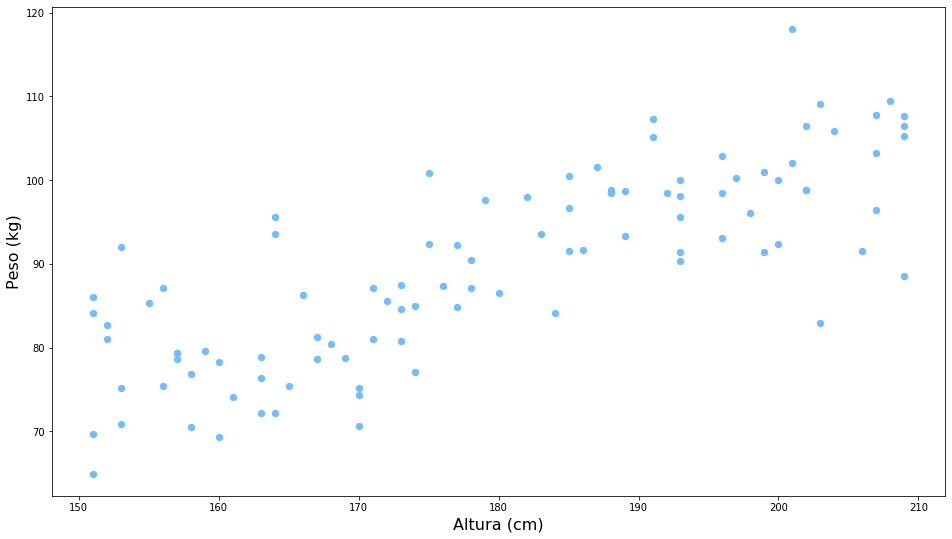

In [55]:
np.random.seed(42)
x_lin = np.random.randint(low=150, high=210, size=100)

y = x_lin*0.47 + 7*np.random.randn(100) + 5

fig, ax = plt.subplots(figsize=(16,9))
ax.scatter(x_lin, y, s=40, c="xkcd:sky blue")
ax.set_ylabel("Peso (kg)")
ax.set_xlabel("Altura (cm)")
ax.xaxis.label.set_fontsize(16)
ax.xaxis.label.set_fontfamily("Sans Serif")
ax.yaxis.label.set_fontsize(16)
ax.yaxis.label.set_fontfamily("Sans Serif")
fig.savefig("images/redes_neurais_04.png", dpi=150);

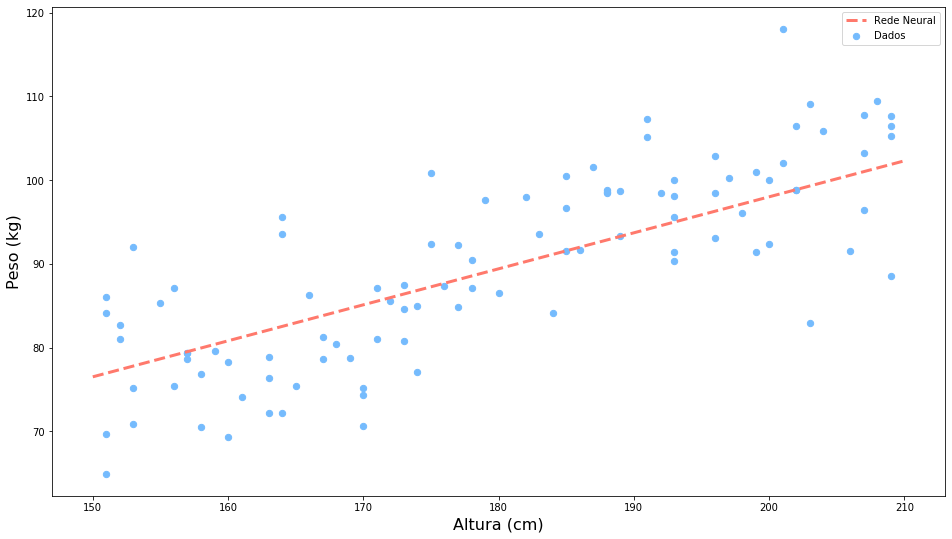

In [50]:
fig, ax = plt.subplots(figsize=(16,9))
ax.scatter(x_lin, y, s=40, c="xkcd:sky blue", label="Dados")
ax.plot(np.linspace(150, 210, 100), np.linspace(150, 210, 100)*0.43 + 12,
        c="xkcd:salmon", ls="dashed", lw=3, label="Rede Neural")
ax.set_ylabel("Peso (kg)")
ax.set_xlabel("Altura (cm)")
ax.xaxis.label.set_fontsize(16)
ax.xaxis.label.set_fontfamily("Sans Serif")
ax.yaxis.label.set_fontsize(16)
ax.yaxis.label.set_fontfamily("Sans Serif")
ax.legend()
fig.savefig("images/redes_neurais_07.png", dpi=150);

# Exemplo função de ativação 

In [58]:
x, y = make_classification(n_features=1, n_informative=1, n_redundant=0, n_clusters_per_class=1)

In [59]:
x = (x + 3.5)*1000 

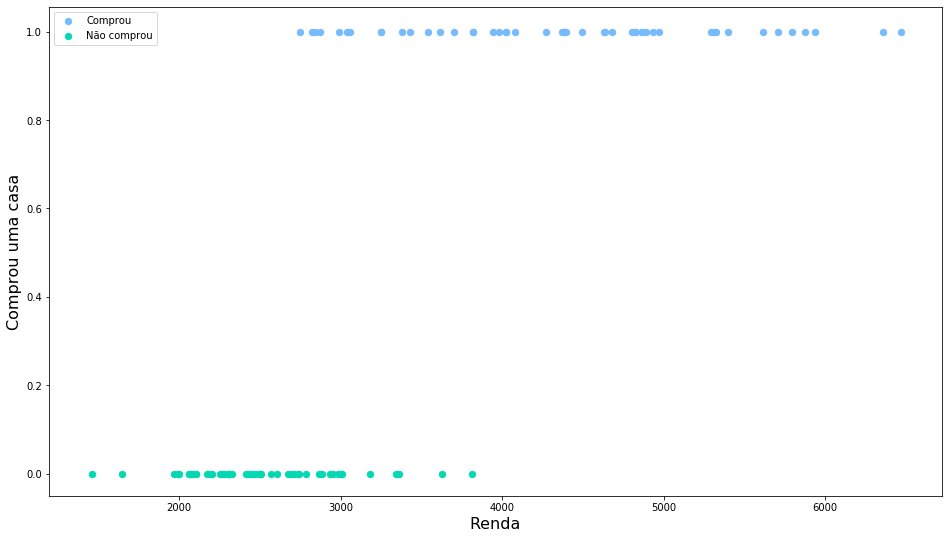

In [72]:
fig, ax = plt.subplots(figsize=(16,9))
ax.scatter(x[y==1], y[y==1], s=40, c="xkcd:sky blue", label="Comprou")
ax.scatter(x[y==0], y[y==0], s=40, c="xkcd:aquamarine", label="Não comprou")
ax.set_ylabel("Comprou uma casa")
ax.set_xlabel("Renda")
ax.xaxis.label.set_fontsize(16)
ax.xaxis.label.set_fontfamily("Sans Serif")
ax.yaxis.label.set_fontsize(16)
ax.yaxis.label.set_fontfamily("Sans Serif")
ax.legend()
fig.savefig("images/redes_neurais_08.png", dpi=150);

In [66]:
lin_reg = LinearRegression()
lin_reg.fit(x, y)

LinearRegression()

In [67]:
lin_reg.coef_

array([0.00031917])

In [68]:
lin_reg.intercept_

-0.5958072606345381

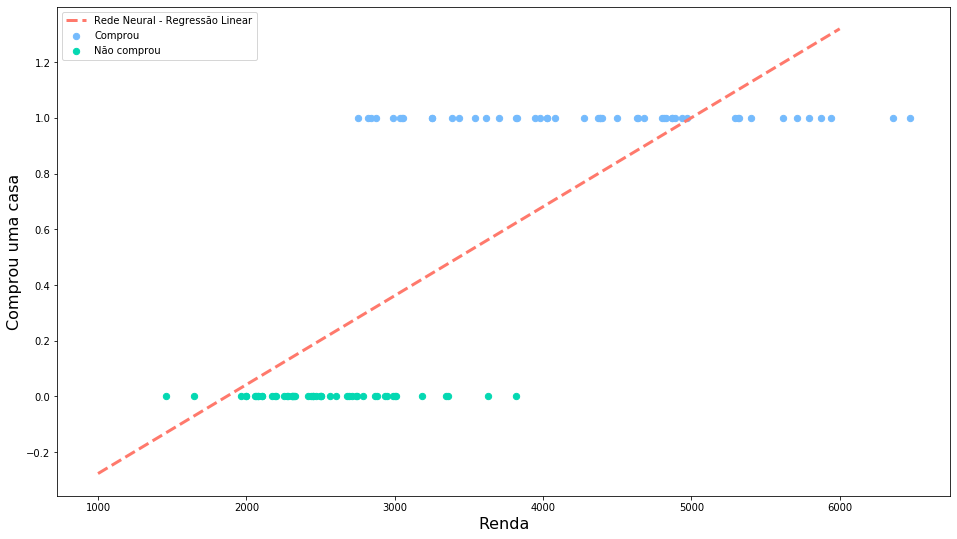

In [91]:
fig, ax = plt.subplots(figsize=(16,9))
ax.scatter(x[y==1], y[y==1], s=40, c="xkcd:sky blue", label="Comprou")
ax.scatter(x[y==0], y[y==0], s=40, c="xkcd:aquamarine", label="Não comprou")
ax.plot(np.linspace(1000, 6000, 100), np.linspace(1000, 6000, 100)*lin_reg.coef_ + lin_reg.intercept_,
        c="xkcd:salmon", label="Rede Neural - Regressão Linear", lw=3, ls="dashed")
ax.set_ylabel("Comprou uma casa")
ax.set_xlabel("Renda")
ax.xaxis.label.set_fontsize(16)
ax.xaxis.label.set_fontfamily("Sans Serif")
ax.yaxis.label.set_fontsize(16)
ax.yaxis.label.set_fontfamily("Sans Serif")
ax.legend()
fig.savefig("images/redes_neurais_09.png", dpi=150);

In [78]:
log_reg = LogisticRegression()

In [79]:
log_reg.fit(x, y)

LogisticRegression()

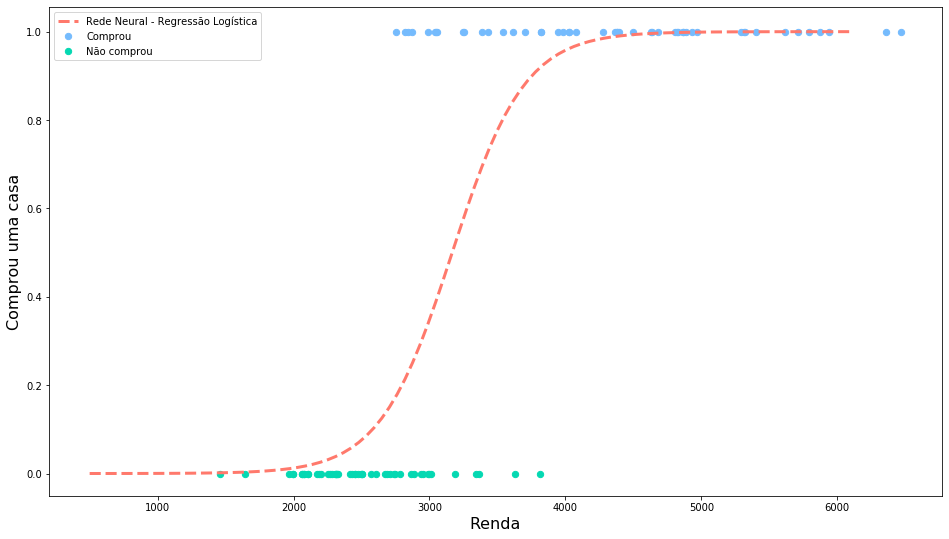

In [89]:
fig, ax = plt.subplots(figsize=(16,9))
ax.scatter(x[y==1], y[y==1], s=40, c="xkcd:sky blue", label="Comprou")
ax.scatter(x[y==0], y[y==0], s=40, c="xkcd:aquamarine", label="Não comprou")
ax.plot(np.linspace(500, 6100, 100), log_reg.predict_proba(np.linspace(500, 6100, 100).reshape(-1,1))[:, 1],
        c="xkcd:salmon", label="Rede Neural - Regressão Logística", lw=3, ls="dashed")
ax.set_ylabel("Comprou uma casa")
ax.set_xlabel("Renda")
ax.xaxis.label.set_fontsize(16)
ax.xaxis.label.set_fontfamily("Sans Serif")
ax.yaxis.label.set_fontsize(16)
ax.yaxis.label.set_fontfamily("Sans Serif")
ax.legend()
fig.savefig("images/redes_neurais_11.png", dpi=150);

In [80]:
log_reg.coef_

array([[0.00375293]])

In [81]:
log_reg.intercept_

array([-11.88720426])

In [82]:
0.003*6100 - 11.9

6.4

In [84]:
1/(1+np.power(np.e, -6.4))

0.9983411989198255

# Gradiente descendente 

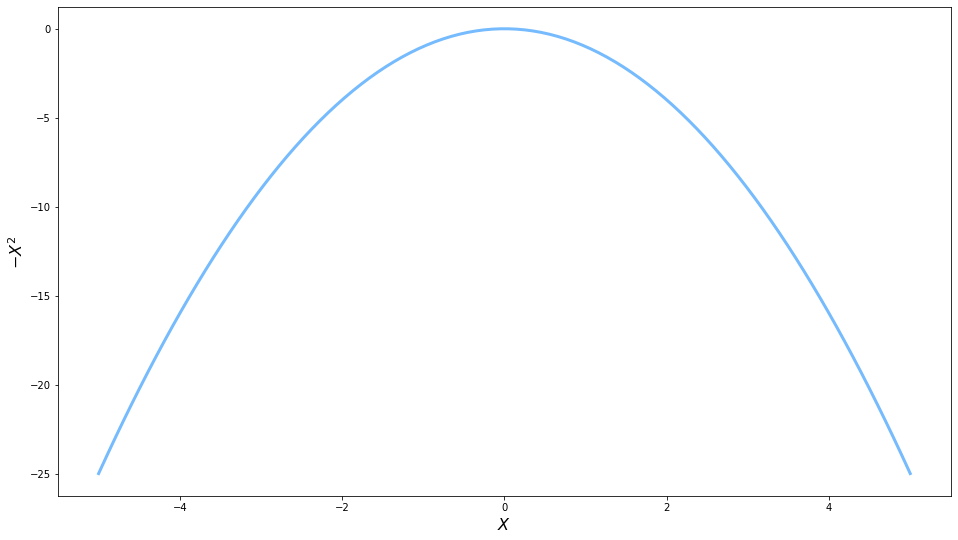

In [95]:
np.random.seed(42)
x_lin = np.linspace(-5, 5, 100)

y = -x_lin**2

fig, ax = plt.subplots(figsize=(16,9))
ax.plot(x_lin, y, c="xkcd:sky blue", lw=3)
ax.set_ylabel("$-X^2$")
ax.set_xlabel("$X$")
ax.xaxis.label.set_fontsize(16)
ax.xaxis.label.set_fontfamily("Sans Serif")
ax.yaxis.label.set_fontsize(16)
ax.yaxis.label.set_fontfamily("Sans Serif")
fig.savefig("images/redes_neurais_13.png", dpi=150);

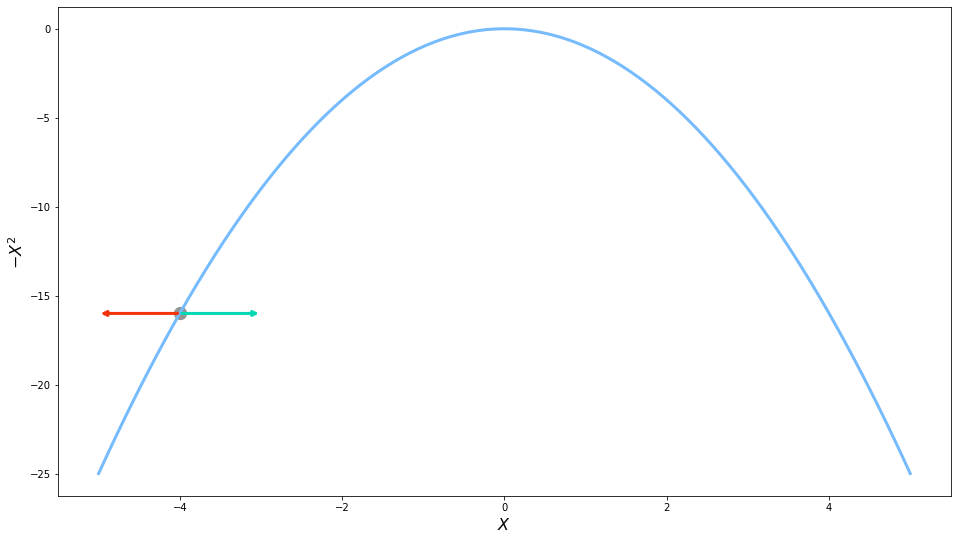

In [118]:
np.random.seed(42)
x_lin = np.linspace(-5, 5, 100)

y = -x_lin**2

fig, ax = plt.subplots(figsize=(16,9))
ax.plot(x_lin, y, c="xkcd:sky blue", lw=3)
ax.scatter([-4], [-16], c="xkcd:grey", s=150)
ax.annotate("", xy=(-3, -16), xytext=(-4, -16), 
            arrowprops=dict(arrowstyle="->", lw=3, fc="xkcd:aquamarine", ec="xkcd:aquamarine"))
ax.annotate("", xy=(-5, -16), xytext=(-4, -16), 
            arrowprops=dict(arrowstyle="->", lw=3, fc="xkcd:vermillion", ec="xkcd:vermillion"))
ax.set_ylabel("$-X^2$")
ax.set_xlabel("$X$")
ax.xaxis.label.set_fontsize(16)
ax.xaxis.label.set_fontfamily("Sans Serif")
ax.yaxis.label.set_fontsize(16)
ax.yaxis.label.set_fontfamily("Sans Serif")
fig.savefig("images/redes_neurais_14.png", dpi=150);

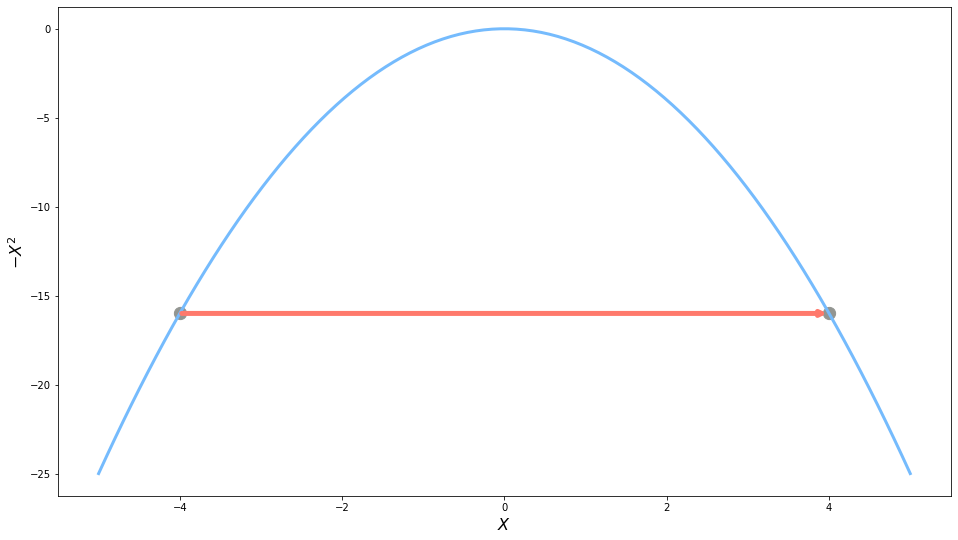

In [123]:
np.random.seed(42)
x_lin = np.linspace(-5, 5, 100)

y = -x_lin**2

fig, ax = plt.subplots(figsize=(16,9))
ax.plot(x_lin, y, c="xkcd:sky blue", lw=3)
ax.scatter([-4], [-16], c="xkcd:grey", s=150)
ax.annotate("", xy=(4, -16), xytext=(-4, -16), 
            arrowprops=dict(arrowstyle="->", lw=5, fc="xkcd:salmon", ec="xkcd:salmon"))
ax.scatter([4], [-16], c="xkcd:grey", s=150)
ax.set_ylabel("$-X^2$")
ax.set_xlabel("$X$")
ax.xaxis.label.set_fontsize(16)
ax.xaxis.label.set_fontfamily("Sans Serif")
ax.yaxis.label.set_fontsize(16)
ax.yaxis.label.set_fontfamily("Sans Serif")
fig.savefig("images/redes_neurais_15.png", dpi=150);

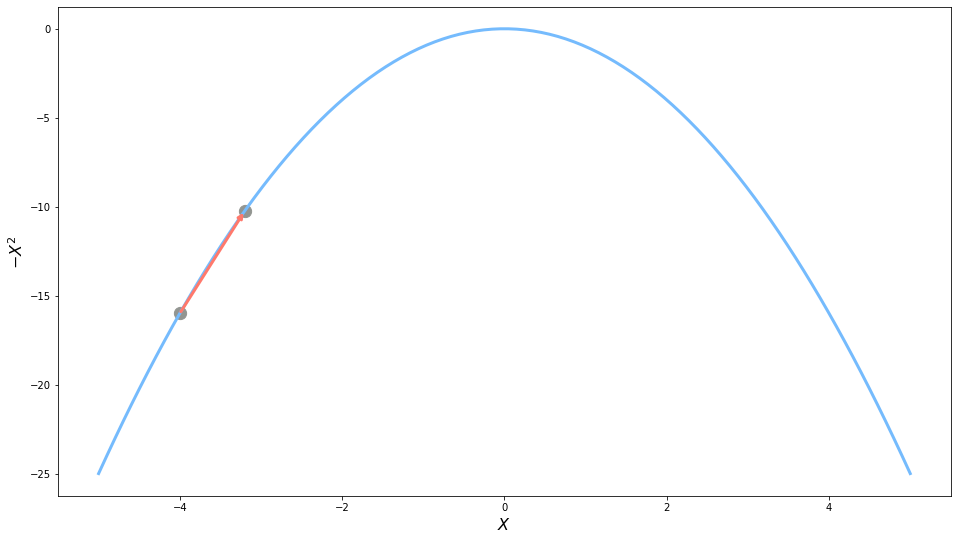

In [127]:
np.random.seed(42)
x_lin = np.linspace(-5, 5, 100)

y = -x_lin**2

fig, ax = plt.subplots(figsize=(16,9))
ax.plot(x_lin, y, c="xkcd:sky blue", lw=3)
ax.scatter([-4], [-16], c="xkcd:grey", s=150)
ax.annotate("", xy=(-3.2, -10.24), xytext=(-4, -16), 
            arrowprops=dict(arrowstyle="->", lw=3, fc="xkcd:salmon", ec="xkcd:salmon"))
ax.scatter([-3.2], [-10.24], c="xkcd:grey", s=150)
ax.set_ylabel("$-X^2$")
ax.set_xlabel("$X$")
ax.xaxis.label.set_fontsize(16)
ax.xaxis.label.set_fontfamily("Sans Serif")
ax.yaxis.label.set_fontsize(16)
ax.yaxis.label.set_fontfamily("Sans Serif")
fig.savefig("images/redes_neurais_16.png", dpi=150);

In [128]:
2.56**2

6.5536

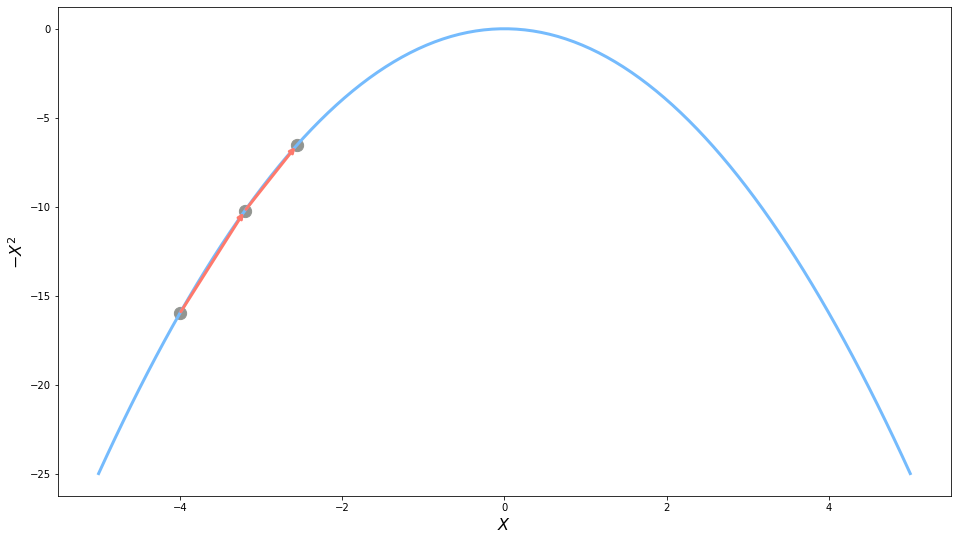

In [129]:
np.random.seed(42)
x_lin = np.linspace(-5, 5, 100)

y = -x_lin**2

fig, ax = plt.subplots(figsize=(16,9))
ax.plot(x_lin, y, c="xkcd:sky blue", lw=3)
ax.scatter([-4], [-16], c="xkcd:grey", s=150)
ax.annotate("", xy=(-2.56, -2.56**2), xytext=(-3.2, -10.24), 
            arrowprops=dict(arrowstyle="->", lw=3, fc="xkcd:salmon", ec="xkcd:salmon"))
ax.scatter([-3.2], [-10.24], c="xkcd:grey", s=150)
ax.annotate("", xy=(-3.2, -10.24), xytext=(-4, -16), 
            arrowprops=dict(arrowstyle="->", lw=3, fc="xkcd:salmon", ec="xkcd:salmon"))
ax.scatter([-2.56], [-2.56**2], c="xkcd:grey", s=150)
ax.set_ylabel("$-X^2$")
ax.set_xlabel("$X$")
ax.xaxis.label.set_fontsize(16)
ax.xaxis.label.set_fontfamily("Sans Serif")
ax.yaxis.label.set_fontsize(16)
ax.yaxis.label.set_fontfamily("Sans Serif")
fig.savefig("images/redes_neurais_17.png", dpi=150);

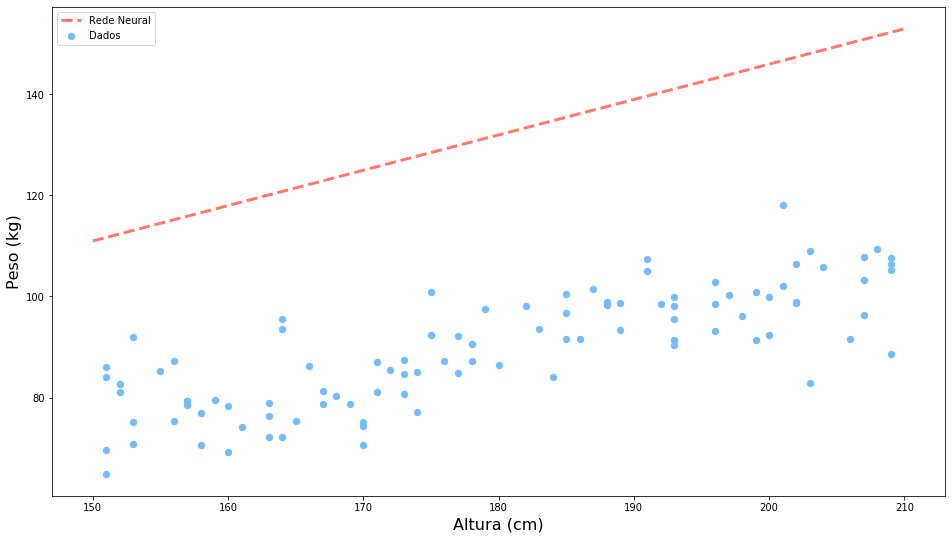

In [139]:
np.random.seed(42)
x_lin = np.random.randint(low=150, high=210, size=100)

y = x_lin*0.47 + 7*np.random.randn(100) + 5

fig, ax = plt.subplots(figsize=(16,9))
ax.scatter(x_lin, y, s=40, c="xkcd:sky blue", label="Dados")
ax.plot(np.linspace(150, 210, 100), np.linspace(150, 210, 100)*0.7 + 6,
        c="xkcd:salmon", ls="dashed", lw=3, label="Rede Neural")
ax.set_ylabel("Peso (kg)")
ax.set_xlabel("Altura (cm)")
ax.xaxis.label.set_fontsize(16)
ax.xaxis.label.set_fontfamily("Sans Serif")
ax.yaxis.label.set_fontsize(16)
ax.yaxis.label.set_fontfamily("Sans Serif")
ax.legend()
fig.savefig("images/redes_neurais_19.png", dpi=150);

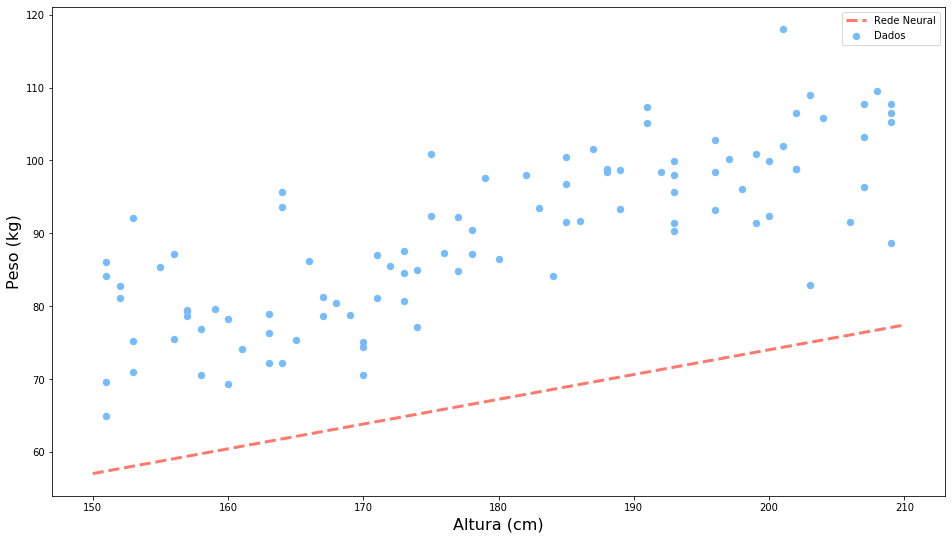

In [141]:
np.random.seed(42)
x_lin = np.random.randint(low=150, high=210, size=100)

y = x_lin*0.47 + 7*np.random.randn(100) + 5

fig, ax = plt.subplots(figsize=(16,9))
ax.scatter(x_lin, y, s=40, c="xkcd:sky blue", label="Dados")
ax.plot(np.linspace(150, 210, 100), np.linspace(150, 210, 100)*0.34 + 5.998,
        c="xkcd:salmon", ls="dashed", lw=3, label="Rede Neural")
ax.set_ylabel("Peso (kg)")
ax.set_xlabel("Altura (cm)")
ax.xaxis.label.set_fontsize(16)
ax.xaxis.label.set_fontfamily("Sans Serif")
ax.yaxis.label.set_fontsize(16)
ax.yaxis.label.set_fontfamily("Sans Serif")
ax.legend()
fig.savefig("images/redes_neurais_22.png", dpi=150);

In [143]:
from celluloid import Camera

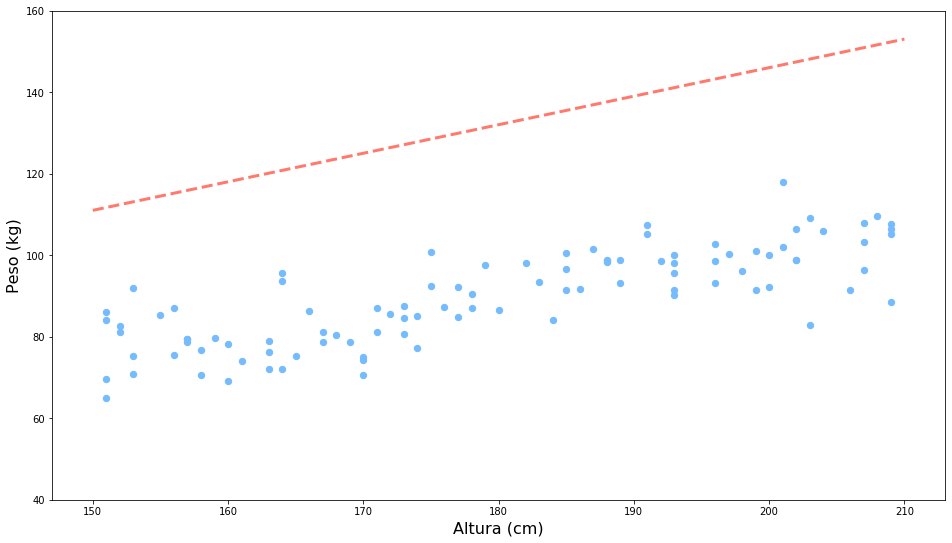

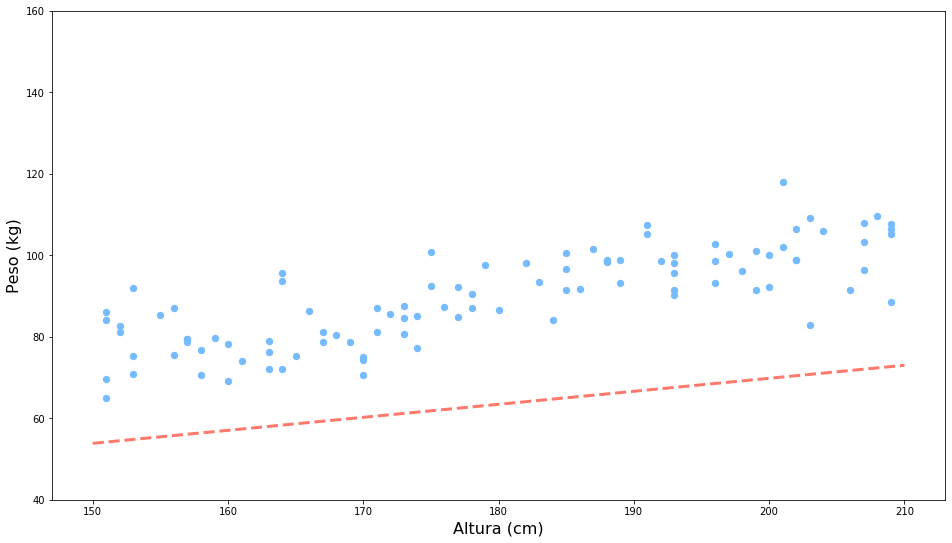

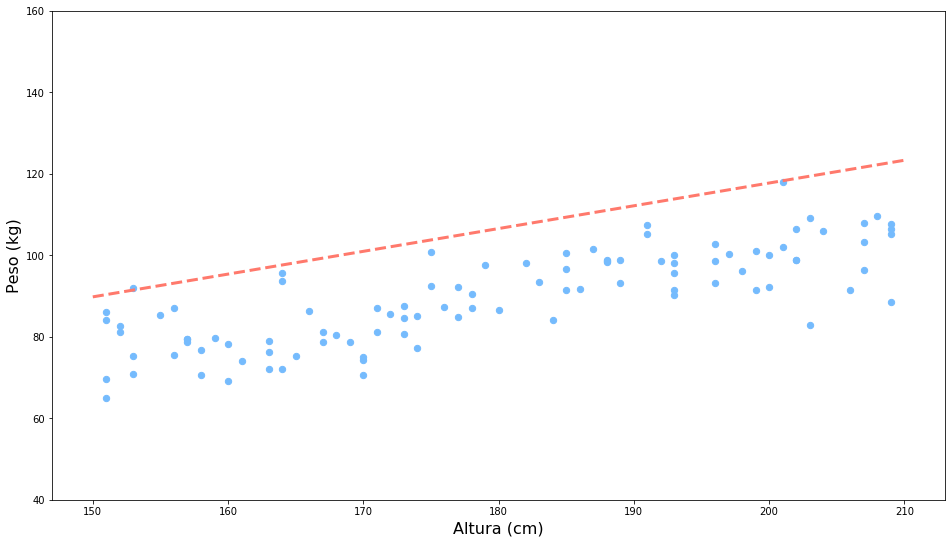

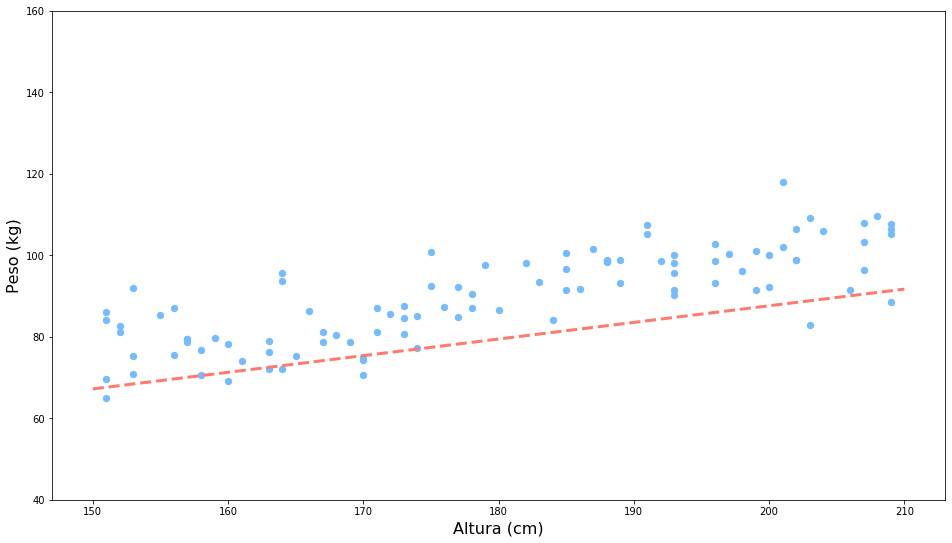

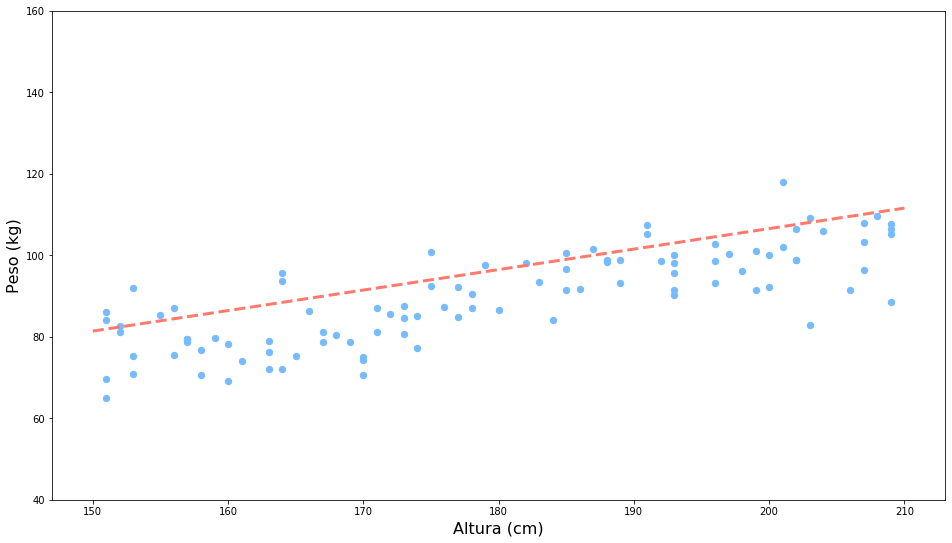

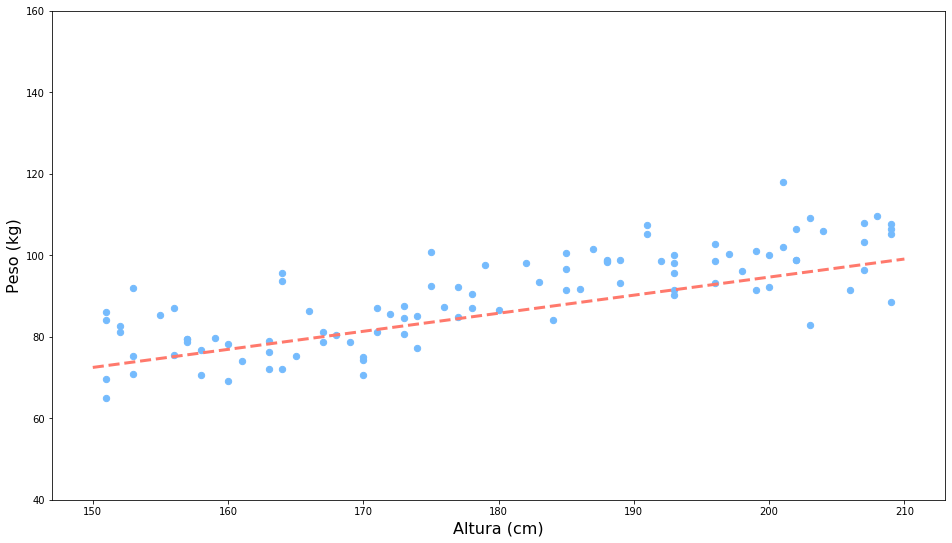

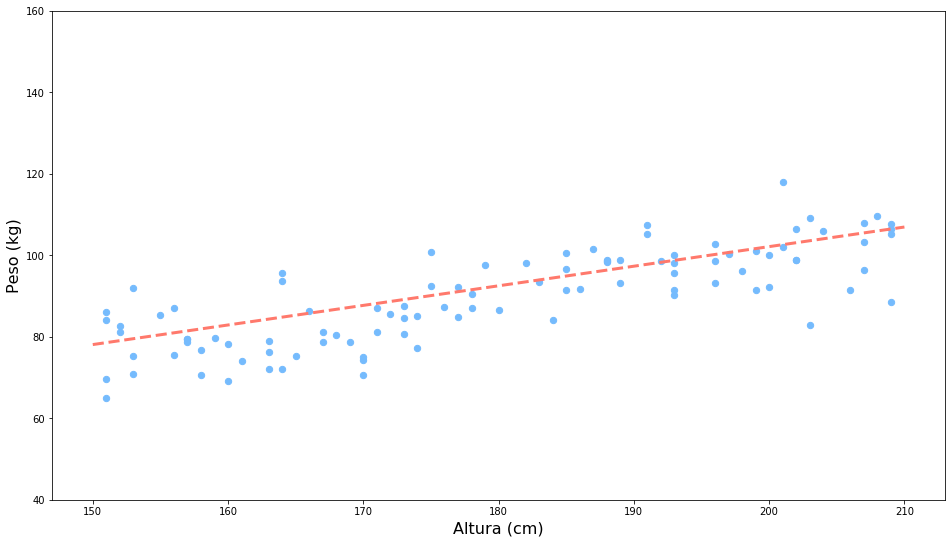

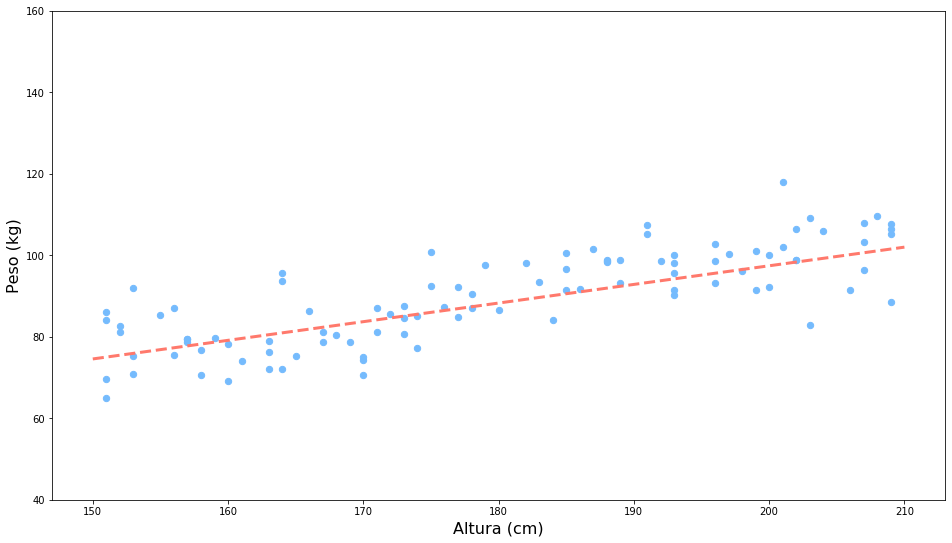

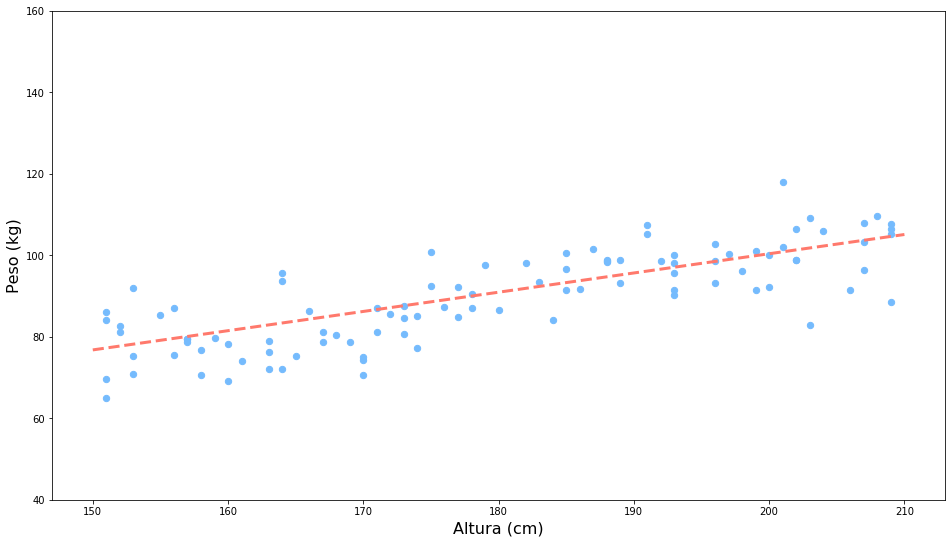

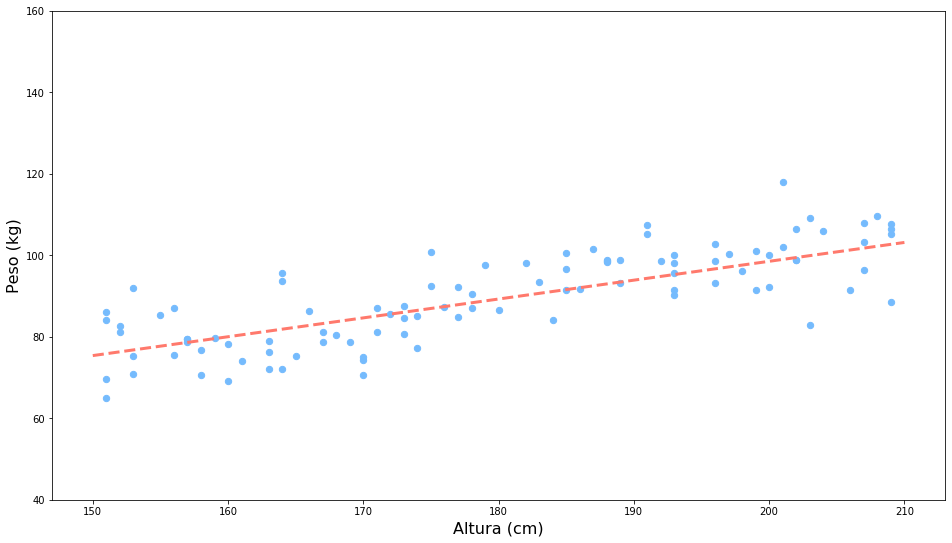

In [150]:
w=0.7
b=6
a = 0.00005

for i in range(10):
    fig, ax = plt.subplots(figsize=(16,9))
    ax.scatter(x_lin, y, s=40, c="xkcd:sky blue", label="Dados")
    ax.plot(np.linspace(150, 210, 100), np.linspace(150, 210, 100)*w + b,
            c="xkcd:salmon", ls="dashed", lw=3, label="Rede Neural")
    ax.set_ylabel("Peso (kg)")
    ax.set_xlabel("Altura (cm)")
    ax.xaxis.label.set_fontsize(16)
    ax.xaxis.label.set_fontfamily("Sans Serif")
    ax.yaxis.label.set_fontsize(16)
    ax.yaxis.label.set_fontfamily("Sans Serif")
    ax.set_ylim([40, 160])
    fig.savefig(f"images/redes_neurais_22_0{i}.png", dpi=150);
    y_hat = x_lin*w + b
    grad_w = np.mean((y_hat - y)*x_lin)
    grad_b = np.mean(y_hat - y)
    w = w - a*(grad_w)
    b = b - a*grad_b

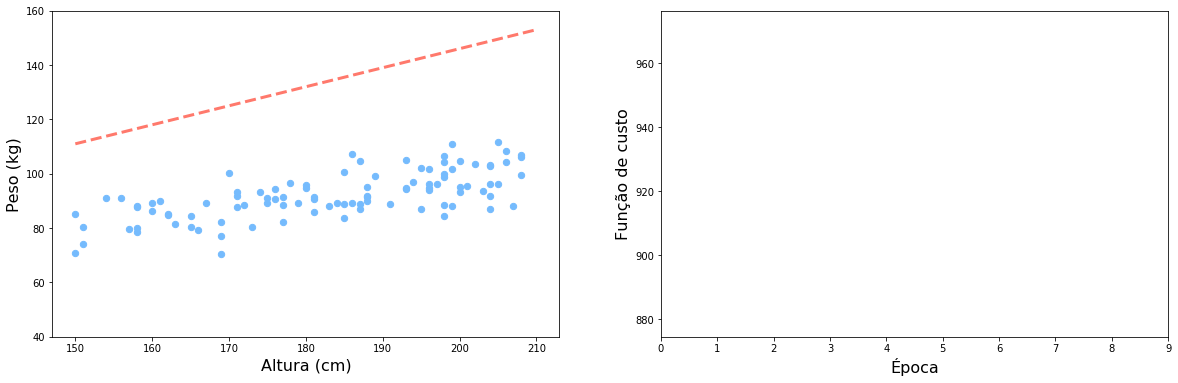

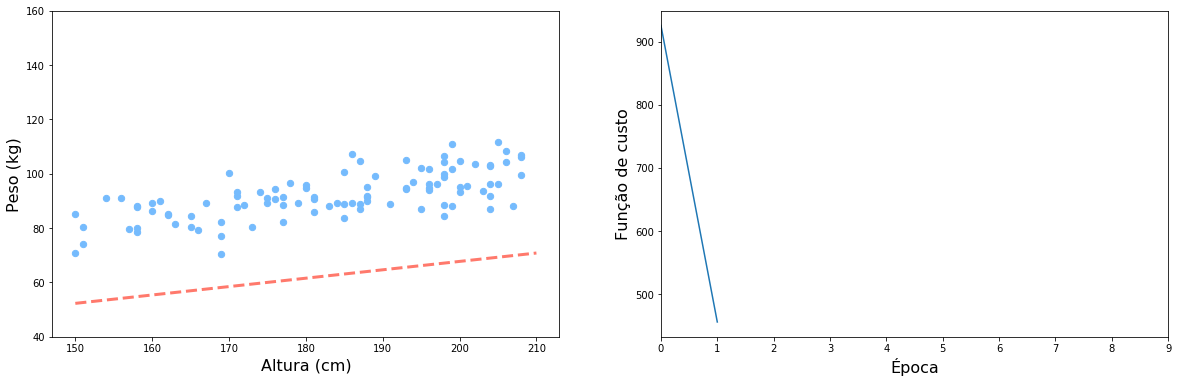

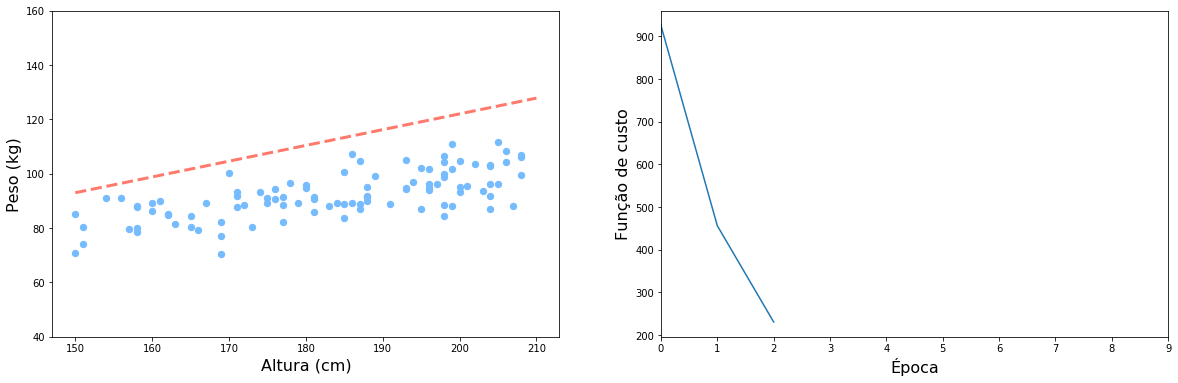

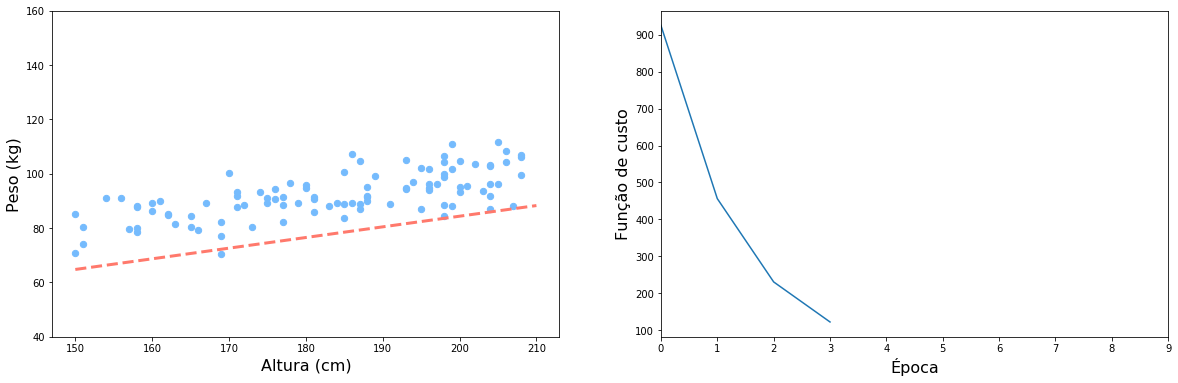

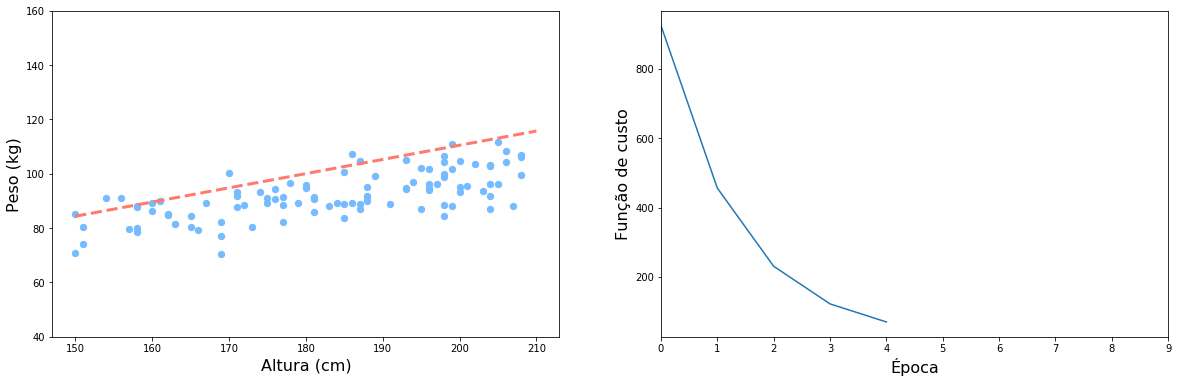

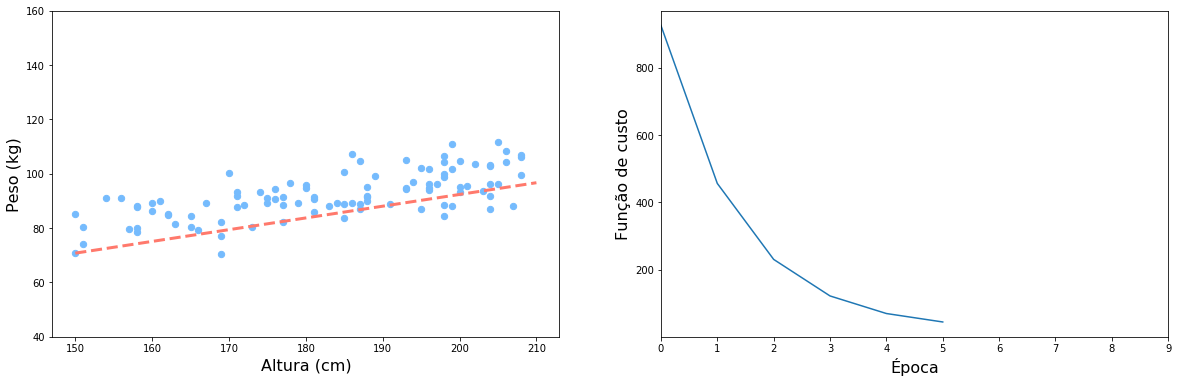

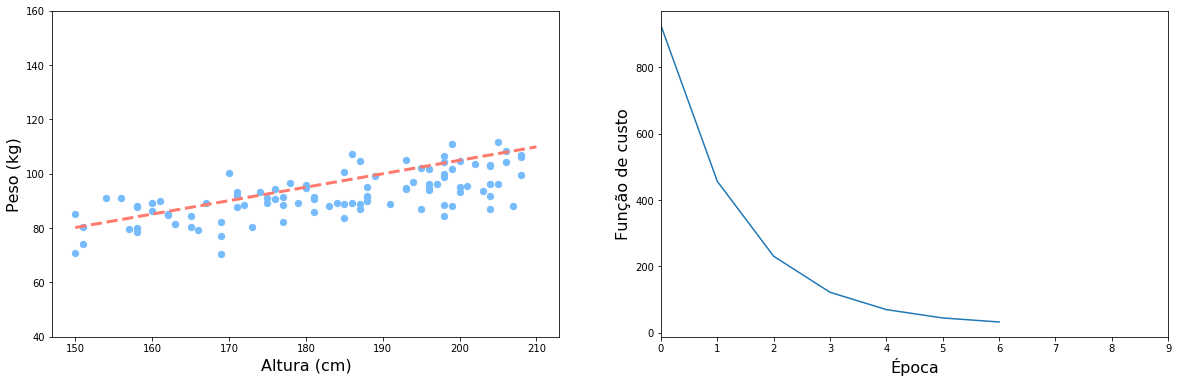

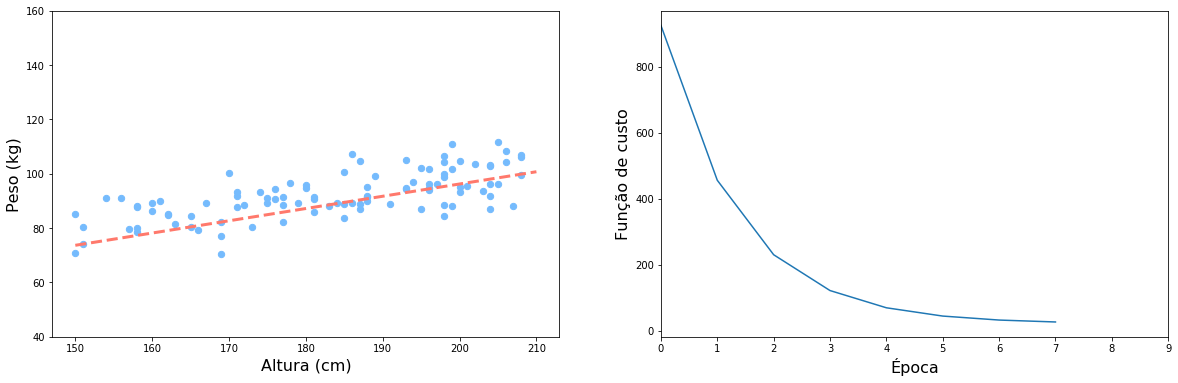

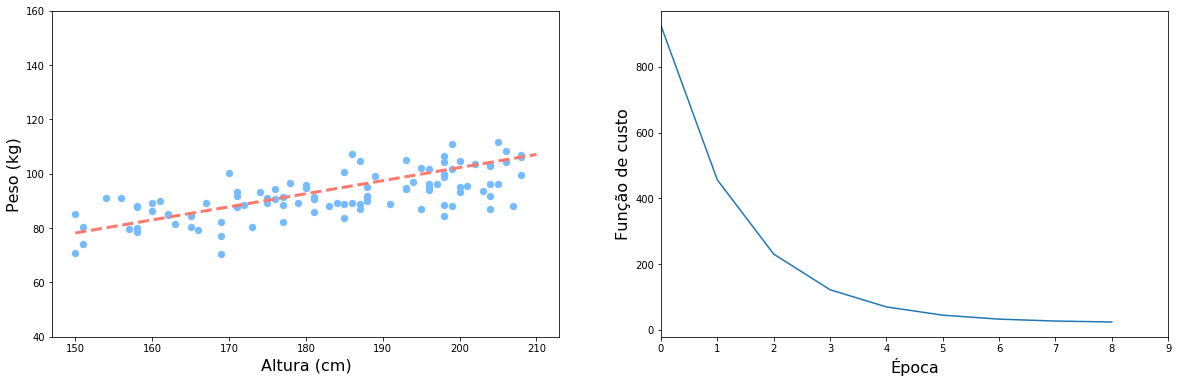

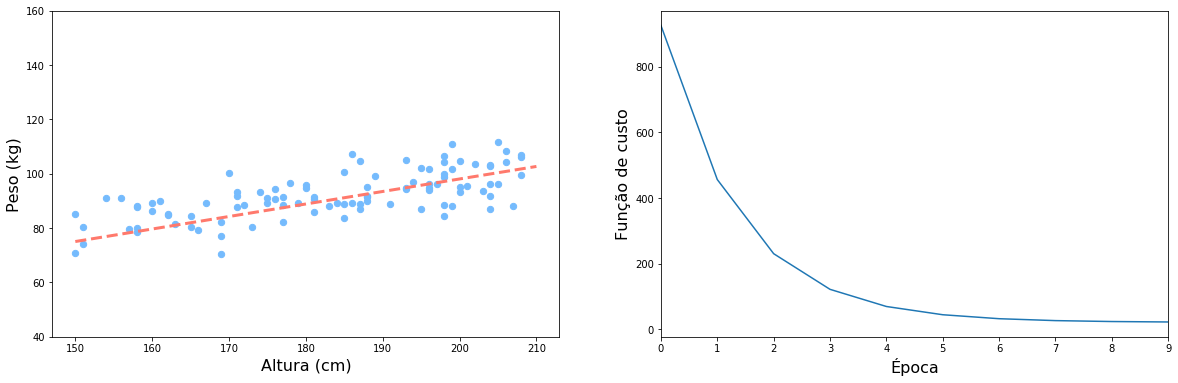

In [6]:
w=0.7
b=6
a = 0.00005

x_lin = np.random.randint(low=150, high=210, size=100)
y = x_lin*0.47 + 7*np.random.randn(100) + 5

loss = []
epochs = []
for i in range(10):
    fig, ax = plt.subplots(ncols=2, figsize=(20,6))
    ax[0].scatter(x_lin, y, s=40, c="xkcd:sky blue", label="Dados")
    ax[0].plot(np.linspace(150, 210, 100), np.linspace(150, 210, 100)*w + b,
            c="xkcd:salmon", ls="dashed", lw=3, label="Rede Neural")
    ax[0].set_ylabel("Peso (kg)")
    ax[0].set_xlabel("Altura (cm)")
    ax[0].xaxis.label.set_fontsize(16)
    ax[0].xaxis.label.set_fontfamily("Sans Serif")
    ax[0].yaxis.label.set_fontsize(16)
    ax[0].yaxis.label.set_fontfamily("Sans Serif")
    ax[0].set_ylim([40, 160])
    epochs.append(i)
    y_hat = x_lin*w + b
    loss.append(np.power(y-y_hat, 2).mean()/2)
    ax[1].set_ylabel("Função de custo")
    ax[1].set_xlabel("Época")
    ax[1].xaxis.label.set_fontsize(16)
    ax[1].xaxis.label.set_fontfamily("Sans Serif")
    ax[1].yaxis.label.set_fontsize(16)
    ax[1].yaxis.label.set_fontfamily("Sans Serif")
    ax[1].plot(epochs, loss)
    ax[1].set_xlim([0,9])
    #fig.savefig(f"images/redes_neurais_22_0{i}.png", dpi=150);
    y_hat = x_lin*w + b
    grad_w = np.mean((y_hat - y)*x_lin)
    grad_b = np.mean(y_hat - y)
    w = w - a*(grad_w)
    b = b - a*grad_b
